In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = "C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Veggi_data/Training"
valid_path = "C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Veggi_data/Testing"

In [3]:
# add preprocessing layer to the front of VGG
mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in mobilenet.layers:
    layer.trainable = False

17225924/17225924 [==============================] - 2s 0us/step


In [4]:
# useful for getting number of classes
folders = glob('C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Veggi_data/Training/*')

In [5]:
folders

['C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Veggi_data/Training\\Bean',
 'C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Veggi_data/Training\\Carrot',
 'C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Veggi_data/Training\\Cauliflower']

In [7]:
# our layers - you can add more if you want
x = Flatten()(mobilenet.output)

# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)


In [8]:
# create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [9]:
# tell the model what cost and optimization method to use
model.compile(
 loss='categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy']
)


In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Veggi_data/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Veggi_data/Testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 900 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [11]:
# fit the model
r = model.fit(
 training_set,
 validation_data=test_set,
 epochs=10,
 steps_per_epoch=len(training_set),
 validation_steps=len(test_set)
)

Epoch 1/10
29/29 [==============================] - 51s 2s/step - loss: 1.4505 - accuracy: 0.8956 - val_loss: 0.0089 - val_accuracy: 0.9944
Epoch 2/10
29/29 [==============================] - 47s 2s/step - loss: 0.0069 - accuracy: 0.9989 - val_loss: 1.2198e-06 - val_accuracy: 1.0000
Epoch 3/10
29/29 [==============================] - 47s 2s/step - loss: 1.3245e-09 - accuracy: 1.0000 - val_loss: 3.8634e-06 - val_accuracy: 1.0000
Epoch 4/10
29/29 [==============================] - 46s 2s/step - loss: 0.0023 - accuracy: 0.9989 - val_loss: 2.6195e-05 - val_accuracy: 1.0000
Epoch 5/10
29/29 [==============================] - 46s 2s/step - loss: 1.6264e-07 - accuracy: 1.0000 - val_loss: 5.7793e-05 - val_accuracy: 1.0000
Epoch 6/10
29/29 [==============================] - 47s 2s/step - loss: 2.0808e-04 - accuracy: 1.0000 - val_loss: 1.7679e-05 - val_accuracy: 1.0000
Epoch 7/10
29/29 [==============================] - 47s 2s/step - loss: 1.0435e-05 - accuracy: 1.0000 - val_loss: 1.2037e-05 - v

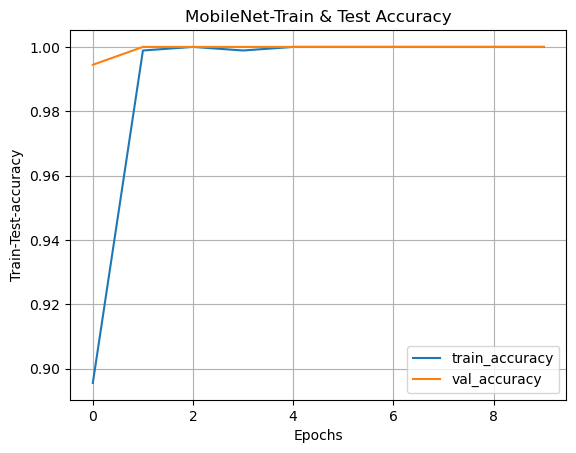

<Figure size 640x480 with 0 Axes>

In [12]:
#Accuracy
plt.title('MobileNet-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test-accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('MobileNet--Accuracy & Val_Accuracy')

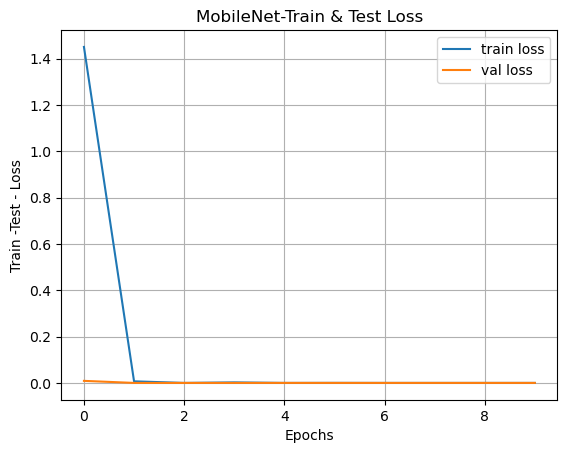

<Figure size 640x480 with 0 Axes>

In [13]:
# loss
plt.title('MobileNet-Train & Test Loss')
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Train -Test - Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('MobileNet--LossVal_loss')

In [14]:
import tensorflow as tf
from keras.models import load_model
model.save('MobileNet_Vegetable_Model.keras')

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [16]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(test_set, 100 // 5)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['Bean', 'Carrot', 'Cauliflower']
print(classification_report(test_set.classes, y_pred, target_names=target_names))


6/6 [==============================] - 7s 950ms/step
Confusion Matrix
[[25 17 18]
 [18 23 19]
 [17 20 23]]
Classification Report
              precision    recall  f1-score   support

        Bean       0.42      0.42      0.42        60
      Carrot       0.38      0.38      0.38        60
 Cauliflower       0.38      0.38      0.38        60

    accuracy                           0.39       180
   macro avg       0.39      0.39      0.39       180
weighted avg       0.39      0.39      0.39       180



<Axes: >

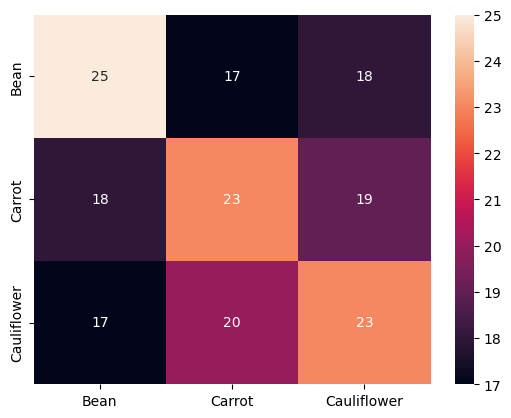

In [17]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes, y_pred),annot=True,xticklabels=['Bean','Carrot','Cauliflower'],
            yticklabels=['Bean', 'Carrot', 'Cauliflower'])